# Project Brief Report:

At first, I imported the necessary libraries, then the dataset from Kaggle for Unemployment Rates in New Zealand, in a .csv format. After that, I imported and printed the first 10 rows of the data to get an overview of the data. After that, I printed the info & features of the dataset. Then I started to explore the data, whether there were missing values, and calculated the descriptive statistics of the dataset. After that I started visualising the data and applied the necessary EDA, I analysed the data and got the mean,max & min of the unemployment rates by age. Then, I visualized the unemployment rates over time, by gender, and by age groups using line plots, as well as analyzed the unemployment rate trends during COVID-19, both overall and by gender. Finally, I tested 3 hypotheses:

1. Hypothesis 1: The COVID-19 pandemic significantly increased the unemployment rate in 2020 compared to previous years.
2. Hypothesis 2: Women experienced a higher increase in unemployment during the COVID-19 pandemic compared to men.
3. Hypothesis 3: The age group “Aged 65 and over Years” had the highest increase in unemployment during the COVID-19 pandemic compared to other age groups

After that, I have provided a test of whether there is an association between the age group “Aged 15-24 Years” and the gender “Male” during the COVID-19 period. The result was that; There is no significant association between age group and gender (the Null Hypothesis wasn't rejected).

# Project 1 - Exploratory Data Analysis for Machine Learning

**Dataset Description:**
In this notebook, I will be using the Unemployment_rates.csv file, hosted on kaggle. This data set is New Zealand's Unemployment rate data. The unemployment rate reflects conditions of the labour market and economy overall. It gives a sense of the number of people seeking work. 
I will clean the data and explore, as well as, I will also construct new features from the dataset & perform 3 hypothesis tests and discuss its result.

**Dataset Attributes:**
1. TimePeriod
2. Aged 15-24 Years
3. Aged 25-34 Years
4. Aged 35-44 Years
5. Aged 45-54 Years
6. Aged 55-64 Years
7. Aged 65 Years and Over
8. Asian
9. European
10. Female
11. Male
12. Maori
13. Pacific Peoples
14. Total
15. Total All Ages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unemployment/Unemployment_rates.csv


In [2]:
#Importing The Necessary Libraries
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

# **Data Overview:**

In [3]:
# Load the dataset
unemployment_rates = pd.read_csv('/kaggle/input/unemployment/Unemployment_rates.csv')
#print the first 10 rows of the dataset
unemployment_rates.head(10)

,TimePeriod,Aged 15-24 Years,Aged 25-34 Years,Aged 35-44 Years,Aged 45-54 Years,Aged 55-64 Years,Aged 65 Years and Over,Asian,European,Female,Male,Maori,Pacific Peoples,Total,Total All Ages
0,31/03/86,8.8,3.6,2.3,2.6,1.3,3.6,0.0,0.0,5.3,3.8,0.0,0.0,4.4,4.4
1,30/06/86,8.0,3.8,2.4,2.5,1.3,1.6,0.0,0.0,4.9,3.6,0.0,0.0,4.1,4.1
2,30/09/86,7.6,4.6,2.5,1.6,1.6,0.2,0.0,0.0,4.7,3.6,0.0,0.0,4.1,4.1
3,31/12/86,7.9,4.2,2.3,1.9,2.1,0.6,0.0,0.0,4.7,3.7,0.0,0.0,4.1,4.1
4,31/03/87,8.3,4.1,2.3,2.1,1.9,1.0,0.0,0.0,4.9,3.8,0.0,0.0,4.3,4.3
5,30/06/87,8.5,4.0,2.4,1.8,1.7,2.2,0.0,0.0,4.5,4.0,0.0,0.0,4.2,4.2
6,30/09/87,7.4,4.1,2.5,2.3,2.2,2.2,0.0,0.0,4.1,4.1,0.0,0.0,4.1,4.1
7,31/12/87,8.7,4.2,2.1,2.0,1.8,0.4,0.0,0.0,4.3,4.3,0.0,0.0,4.3,4.3
8,31/03/88,10.4,4.9,3.0,2.5,2.0,1.5,0.0,0.0,5.3,5.1,0.0,0.0,5.2,5.2
9,30/06/88,10.9,5.3,3.2,2.9,2.4,1.7,0.0,0.0,5.5,5.4,0.0,0.0,5.5,5.5


In [4]:
#find information about the features and and types of the used datasets
unemployment_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TimePeriod              141 non-null    object 
 1   Aged 15-24 Years        141 non-null    float64
 2   Aged 25-34 Years        141 non-null    float64
 3   Aged 35-44 Years        141 non-null    float64
 4   Aged 45-54 Years        141 non-null    float64
 5   Aged 55-64 Years        141 non-null    float64
 6   Aged 65 Years and Over  141 non-null    float64
 7   Asian                   141 non-null    float64
 8   European                141 non-null    float64
 9   Female                  141 non-null    float64
 10  Male                    141 non-null    float64
 11  Maori                   141 non-null    float64
 12  Pacific Peoples         141 non-null    float64
 13  Total                   141 non-null    float64
 14  Total All Ages          141 non-null    fl

In [5]:
#entries in our dataset
unemployment_rates.shape

(141, 15)

There are 15 columns and 141 rows in this dataset. The columns refer to the attributes such as TimePeriod, Aged 15-24, Asian, Total All Ages, etc.

In [6]:
#print all the column names
unemployment_rates.columns

Index(['TimePeriod', 'Aged 15-24 Years', 'Aged 25-34 Years',
       'Aged 35-44 Years', 'Aged 45-54 Years', 'Aged 55-64 Years',
       'Aged 65 Years and Over', 'Asian', 'European', 'Female', 'Male',
       'Maori', 'Pacific Peoples', 'Total', 'Total All Ages'],
      dtype='object')

In [7]:
# Get the data types of each column
unemployment_rates.dtypes

TimePeriod                 object
Aged 15-24 Years          float64
Aged 25-34 Years          float64
Aged 35-44 Years          float64
Aged 45-54 Years          float64
Aged 55-64 Years          float64
Aged 65 Years and Over    float64
Asian                     float64
European                  float64
Female                    float64
Male                      float64
Maori                     float64
Pacific Peoples           float64
Total                     float64
Total All Ages            float64
dtype: object

# Data Exploration & Cleaning

In [8]:
#cheching if there are any missing values in each columns
unemployment_rates.isnull().sum()

TimePeriod                0
Aged 15-24 Years          0
Aged 25-34 Years          0
Aged 35-44 Years          0
Aged 45-54 Years          0
Aged 55-64 Years          0
Aged 65 Years and Over    0
Asian                     0
European                  0
Female                    0
Male                      0
Maori                     0
Pacific Peoples           0
Total                     0
Total All Ages            0
dtype: int64

In [9]:
# Double-checking for the missing values,True output means that a missing values exits, otherwise False means no missing values
unemployment_rates.isnull().values.any()

False

Since there is no missing values, we will get the descriptive statistics of the numerical attributes.

In [10]:
#descriptive statistics of the dataset
unemployment_rates.describe()

,Aged 15-24 Years,Aged 25-34 Years,Aged 35-44 Years,Aged 45-54 Years,Aged 55-64 Years,Aged 65 Years and Over,Asian,European,Female,Male,Maori,Pacific Peoples,Total,Total All Ages
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,13.243972,5.818440,4.211348,3.641135,3.453901,1.524113,2.282270,1.542553,6.023404,5.872340,4.198582,4.093617,5.943972,5.943972
std,2.963790,2.004124,1.465025,1.304611,1.272765,0.701010,3.049386,2.006462,1.549499,2.159732,5.519239,5.477607,1.863498,1.863498
min,7.400000,2.900000,2.000000,1.600000,1.000000,0.200000,0.000000,0.000000,3.200000,3.100000,0.000000,0.000000,3.200000,3.200000
25%,11.200000,4.200000,3.000000,2.600000,2.600000,1.100000,0.000000,0.000000,4.900000,4.100000,0.000000,0.000000,4.400000,4.400000
50%,13.100000,5.600000,4.000000,3.500000,3.300000,1.400000,0.000000,0.000000,5.900000,5.400000,0.000000,0.000000,5.600000,5.600000
75%,15.200000,6.700000,5.000000,4.200000,4.100000,1.800000,5.000000,3.700000,6.800000,6.700000,9.500000,9.100000,6.800000,6.800000
max,21.200000,11.500000,8.000000,7.400000,7.300000,4.400000,9.300000,5.100000,10.800000,12.000000,14.700000,15.000000,11.400000,11.400000


In [11]:
# changing date datatype to datetime
unemployment_rates['TimePeriod'] = pd.to_datetime(unemployment_rates['TimePeriod'], format='%d/%m/%y')
unemployment_rates.describe()

,TimePeriod,Aged 15-24 Years,Aged 25-34 Years,Aged 35-44 Years,Aged 45-54 Years,Aged 55-64 Years,Aged 65 Years and Over,Asian,European,Female,Male,Maori,Pacific Peoples,Total,Total All Ages
count,141,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,2003-09-30 06:38:17.872340480,13.243972,5.818440,4.211348,3.641135,3.453901,1.524113,2.282270,1.542553,6.023404,5.872340,4.198582,4.093617,5.943972,5.943972
min,1986-03-31 00:00:00,7.400000,2.900000,2.000000,1.600000,1.000000,0.200000,0.000000,0.000000,3.200000,3.100000,0.000000,0.000000,3.200000,3.200000
25%,1994-12-31 00:00:00,11.200000,4.200000,3.000000,2.600000,2.600000,1.100000,0.000000,0.000000,4.900000,4.100000,0.000000,0.000000,4.400000,4.400000
50%,2003-09-30 00:00:00,13.100000,5.600000,4.000000,3.500000,3.300000,1.400000,0.000000,0.000000,5.900000,5.400000,0.000000,0.000000,5.600000,5.600000
75%,2012-06-30 00:00:00,15.200000,6.700000,5.000000,4.200000,4.100000,1.800000,5.000000,3.700000,6.800000,6.700000,9.500000,9.100000,6.800000,6.800000
max,2021-03-31 00:00:00,21.200000,11.500000,8.000000,7.400000,7.300000,4.400000,9.300000,5.100000,10.800000,12.000000,14.700000,15.000000,11.400000,11.400000
std,NaN,2.963790,2.004124,1.465025,1.304611,1.272765,0.701010,3.049386,2.006462,1.549499,2.159732,5.519239,5.477607,1.863498,1.863498


# Data Visualization & EDA

In [12]:
# Analyze the data
print("Analysis of Unemployment Rates by Age:")
print("======================================")
print("Total Unemployment Rates:")
print(unemployment_rates)
print("\nAverage Unemployment Rate:", unemployment_rates.mean())
print("Maximum Unemployment Rate:", unemployment_rates.max())
print("Minimum Unemployment Rate:", unemployment_rates.min())

Analysis of Unemployment Rates by Age:
Total Unemployment Rates:
    TimePeriod  Aged 15-24 Years  Aged 25-34 Years  Aged 35-44 Years  \
0   1986-03-31               8.8               3.6               2.3   
1   1986-06-30               8.0               3.8               2.4   
2   1986-09-30               7.6               4.6               2.5   
3   1986-12-31               7.9               4.2               2.3   
4   1987-03-31               8.3               4.1               2.3   
..         ...               ...               ...               ...   
136 2020-03-31              12.5               3.7               3.3   
137 2020-06-30              10.0               3.9               3.0   
138 2020-09-30              13.2               4.6               3.9   
139 2020-12-31              13.8               4.6               3.1   
140 2021-03-31              13.1               4.8               3.5   

     Aged 45-54 Years  Aged 55-64 Years  Aged 65 Years and Over  Asian

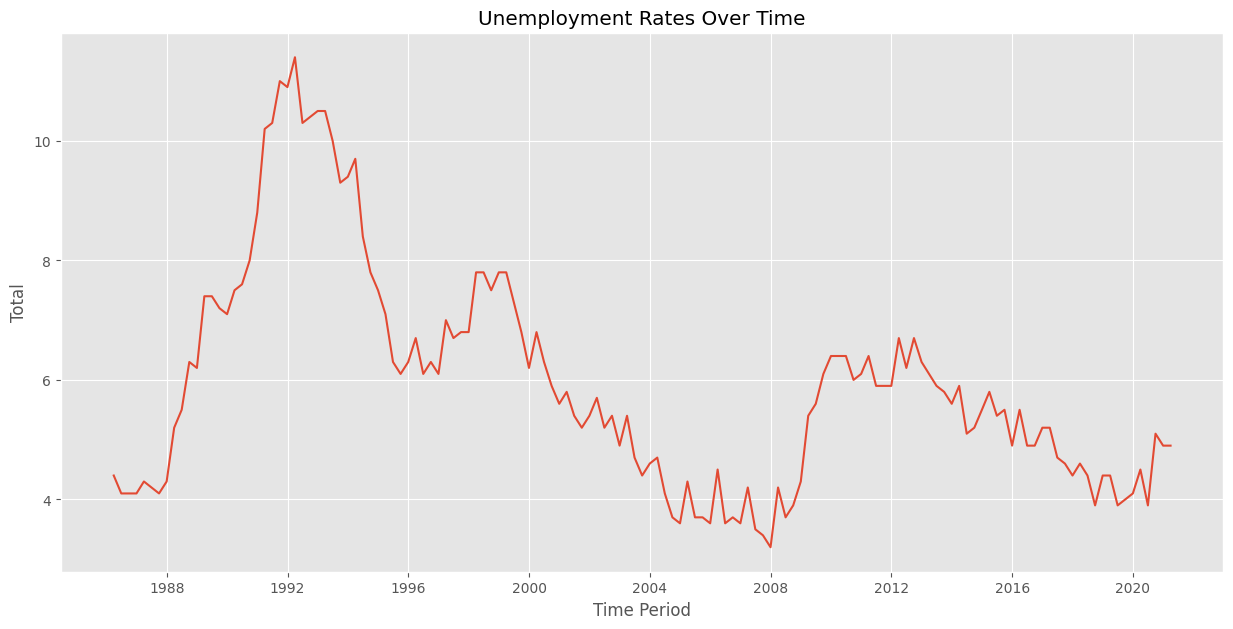

In [14]:
# Set the plot style
plt.style.use('ggplot')
plt.figure(figsize=(15, 7))

# Plot the data
plt.plot(unemployment_rates['TimePeriod'], unemployment_rates['Total'])

# Labels and titles
plt.xlabel('Time Period')
plt.ylabel('Total')
plt.title('Unemployment Rates Over Time')

# Show the plot
plt.show()

The graph shows the unemployment rates over time from 1988 to 2020. There is a peak around 1992 and a trough around 2015, indicating fluctuations in unemployment rates during this period.

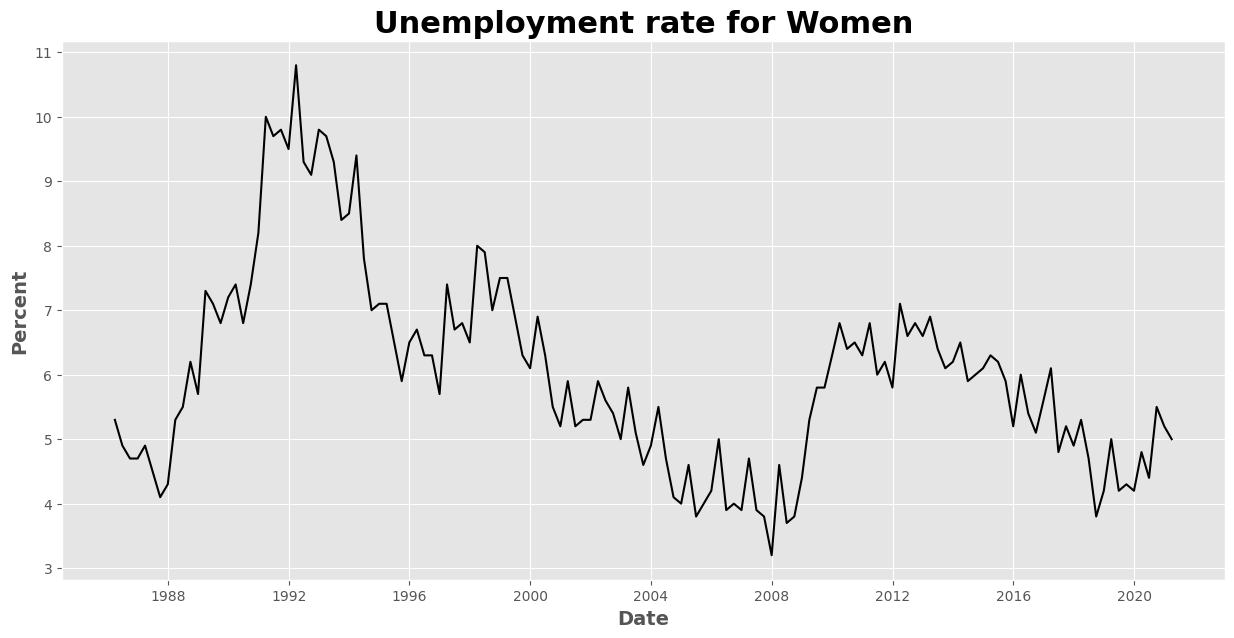

In [15]:
# unemployment rate for women
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
sns.lineplot(data=unemployment_rates, x='TimePeriod', y='Female', color='black')

plt.title('Unemployment rate for Women',fontdict= { 'fontsize': 22, 'fontweight':'bold'})
plt.ylabel('Percent', fontdict= { 'fontsize': 14, 'fontweight':'bold'})
plt.xlabel('Date', fontdict= { 'fontsize': 14, 'fontweight':'bold'})


plt.show()

This line graph represents the unemployment rate for women from 1988 to 2020. The rate peaks in 1992 and 2009, and is at its lowest in 2000 and 2019, indicating fluctuations in women's unemployment over this period.

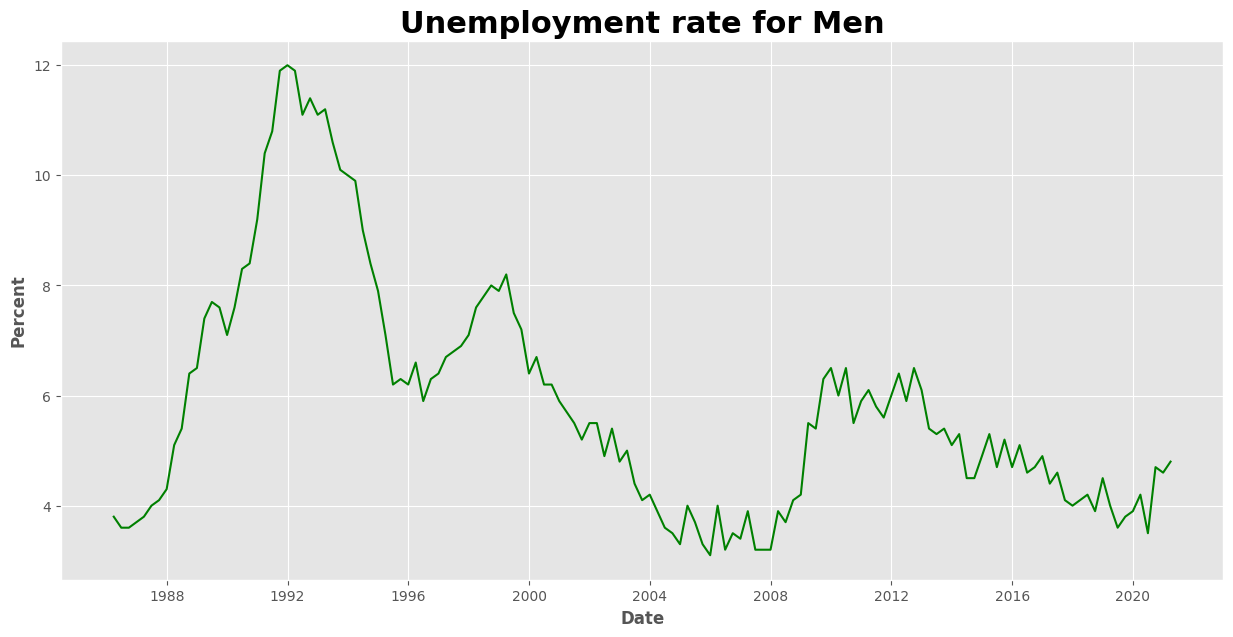

In [16]:
# unemployment rate for men
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
sns.lineplot(data=unemployment_rates, x='TimePeriod', y='Male', color='green')

plt.title('Unemployment rate for Men',fontdict= { 'fontsize': 22, 'fontweight':'bold'})
plt.ylabel('Percent', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.xlabel('Date', fontdict= { 'fontsize': 12, 'fontweight':'bold'})


plt.show()

This line graph represents the unemployment rate for men from 2008 to 2020. The green line indicates a peak in unemployment around 1992, followed by a gradual decrease from 2008 to 2020. This suggests a general improvement in the job market for men over this period.

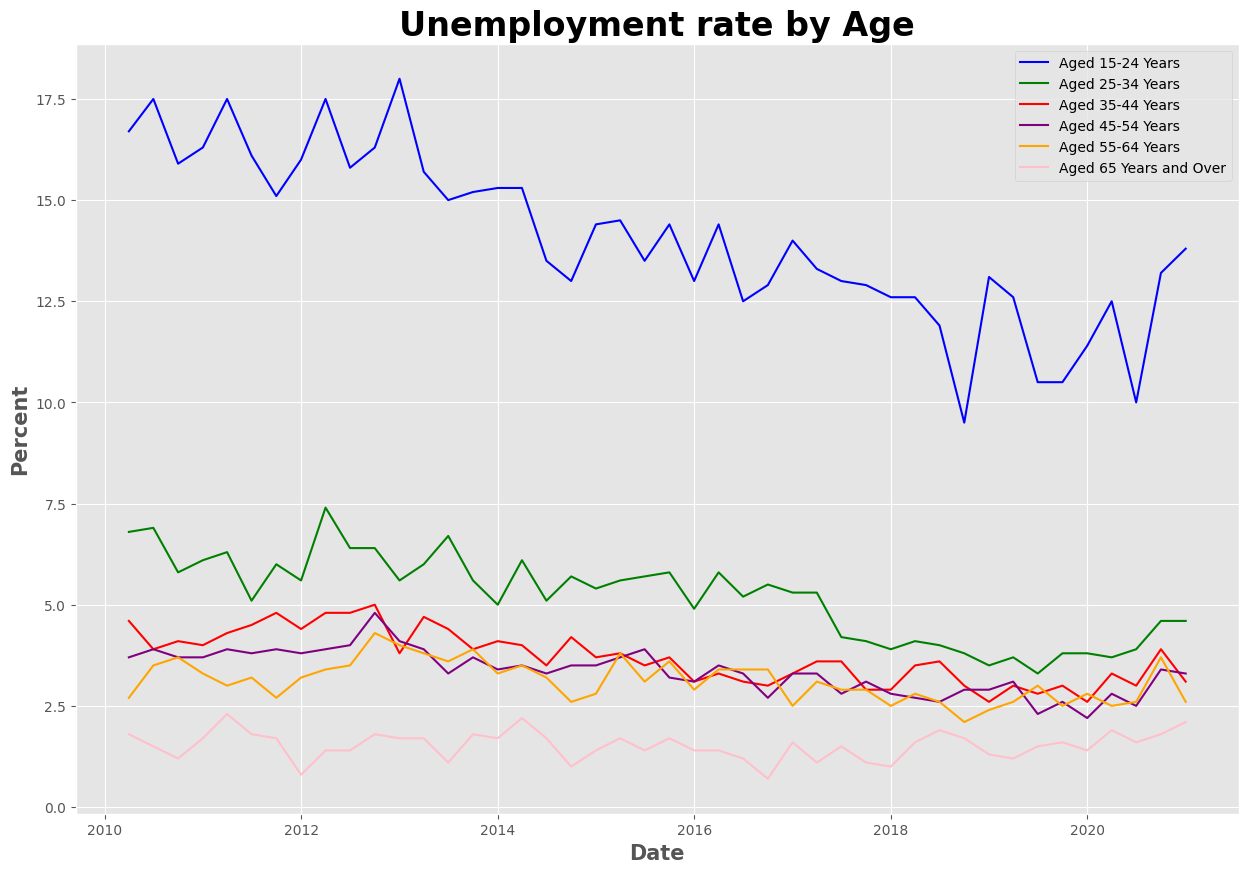

In [17]:
#plotting the unemployment rate from 2010 to 2020
age_groups = {
    "Aged 15-24 Years": "blue",
    "Aged 25-34 Years": "green",
    "Aged 35-44 Years": "red",
    "Aged 45-54 Years": "purple",
    "Aged 55-64 Years": "orange",
    "Aged 65 Years and Over": "pink"
}

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

# Filtering the data for the specified period time 
filtered_data = unemployment_rates[(unemployment_rates.TimePeriod >= '2010-03-31') & (unemployment_rates.TimePeriod <= '2020-12-31')]

# Iterate through the age groups 
for age_group, color in age_groups.items():
    sns.lineplot(data=filtered_data, x="TimePeriod", y=age_group, label=age_group, color=color)

plt.title('Unemployment rate by Age', fontdict={'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel('Percent', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.legend(loc='upper right') 

plt.show()

The line graph shows the unemployment rates from 2010 to 2020 for different age groups: "Aged 15-24 Years", "Aged 25-34 Years", "Aged 35-44 Years", "Aged 45-54 Years", "Aged 55-64 Years",and "Aged 65 Years and Over". The highest unemployment rate throughout the period is observed in the "Aged 15-24 Years" group, while the other groups show lower rates.

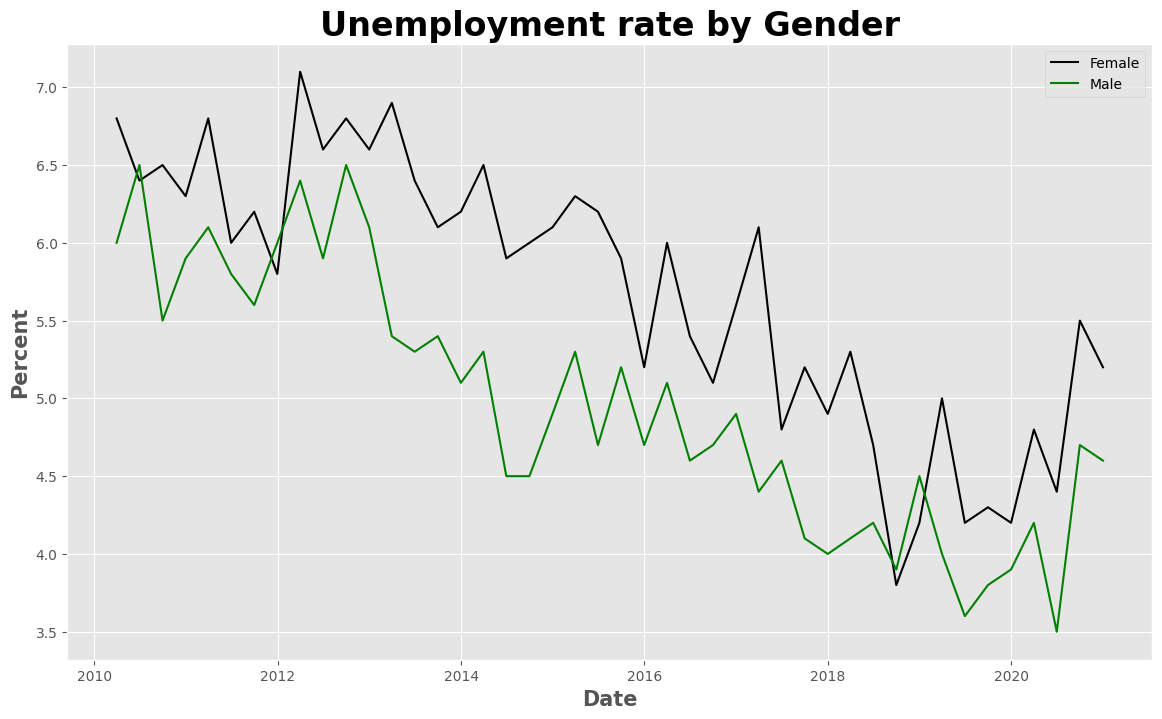

In [18]:
#Unemployment rate by Gender between 2010 to 2020
genders = {
    "Female": "black",
    "Male": "green"
}

plt.style.use('ggplot')
plt.figure(figsize=(14, 8))

filtered_data = unemployment_rates[(unemployment_rates.TimePeriod >= '2010-03-31') & (unemployment_rates.TimePeriod <= '2020-12-31')]

for gender, color in genders.items():
    sns.lineplot(data=filtered_data, x="TimePeriod", y=gender, label=gender, color=color)

plt.title('Unemployment rate by Gender', fontdict={'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel('Percent', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Date', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.legend(loc='upper right')

plt.show()

The line graph shows the unemployment rates for males and females from 2010 to 2020. The unemployment rate for both genders peaked in 2012 and 2020, with the lowest rates occurring in 2018. Overall, the unemployment rate for females is slightly higher than that for males.

In [19]:
# Analysing the unemployment rate during COVID
covid19 = unemployment_rates[(unemployment_rates.TimePeriod >= '2019-12-31')]
covid19.tail()

,TimePeriod,Aged 15-24 Years,Aged 25-34 Years,Aged 35-44 Years,Aged 45-54 Years,Aged 55-64 Years,Aged 65 Years and Over,Asian,European,Female,Male,Maori,Pacific Peoples,Total,Total All Ages
136,2020-03-31,12.5,3.7,3.3,2.8,2.5,1.9,5.0,3.5,4.8,4.2,8.6,7.8,4.5,4.5
137,2020-06-30,10.0,3.9,3.0,2.5,2.6,1.6,4.4,3.3,4.4,3.5,6.6,6.3,3.9,3.9
138,2020-09-30,13.2,4.6,3.9,3.4,3.7,1.8,5.5,4.3,5.5,4.7,8.8,8.0,5.1,5.1
139,2020-12-31,13.8,4.6,3.1,3.3,2.6,2.1,5.2,3.7,5.2,4.6,9.0,9.6,4.9,4.9
140,2021-03-31,13.1,4.8,3.5,3.1,2.9,1.6,4.6,4.1,5.0,4.8,8.7,10.4,4.9,4.9


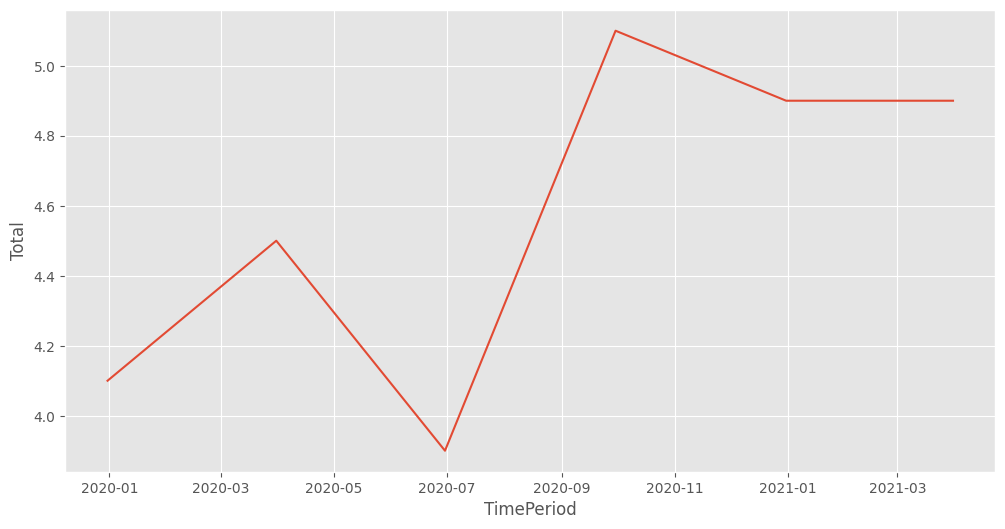

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data = covid19, x='TimePeriod', y='Total');

The graph represents the total number of COVID-19 unemployment rate over time. The line shows a general upward trend, indicating an increase in COVID-19 unemployment rate over this period. The highest point is in October 2020, and the lowest point is in July 2020. This suggests that the number of COVID-19 unemployment rate has significantly increased over this time period.

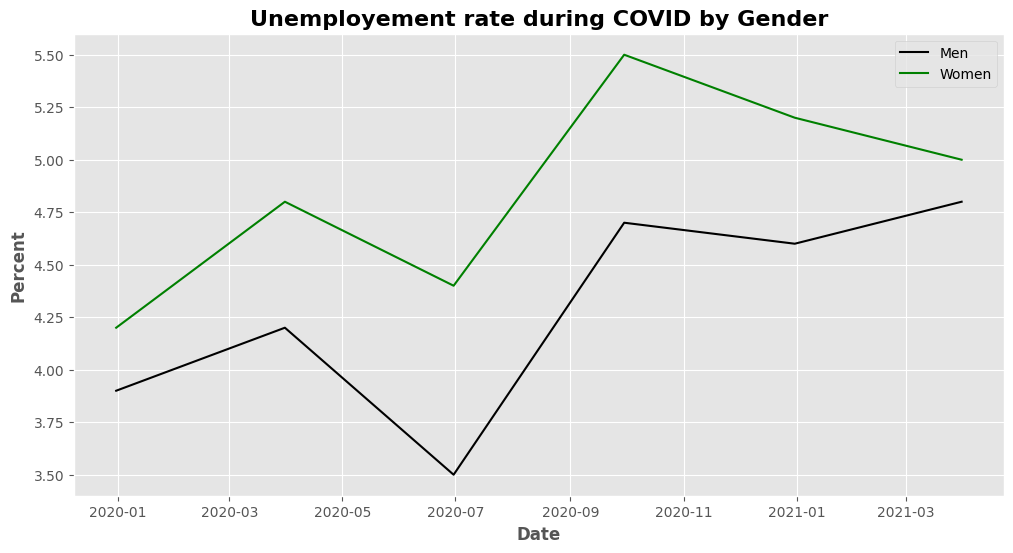

In [21]:
# Unemployement rate during COVID by Gender
plt.figure(figsize=(12,6))
sns.lineplot(data = covid19, x='TimePeriod', y='Male', label='Men', color='Black')
sns.lineplot(data = covid19, x='TimePeriod', y='Female', label='Women', color='Green');
plt.legend
plt.title('Unemployement rate during COVID by Gender',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.ylabel('Percent', fontdict= { 'fontsize': 12, 'fontweight':'bold'})
plt.xlabel('Date', fontdict= { 'fontsize': 12, 'fontweight':'bold'})

plt.show()

The graph represents the unemployment rate during COVID-19 by gender. The graph shows that the unemployment rate for women is higher than for men. Both lines peak in October 2020, indicating that the unemployment rate for both genders was highest at this time. This suggests that while both genders were impacted by unemployment during COVID-19, women were slightly more affected than men.

In [22]:
# Calculate the descriptive statistics for 'Male' and 'Female' columns
male_stats = covid19['Male'].describe()
female_stats = covid19['Female'].describe()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Male': male_stats,
    'Female': female_stats
})

# Display the summary DataFrame
print(summary_df)

           Male    Female
count  6.000000  6.000000
mean   4.283333  4.850000
std    0.511534  0.488876
min    3.500000  4.200000
25%    3.975000  4.500000
50%    4.400000  4.900000
75%    4.675000  5.150000
max    4.800000  5.500000


The descriptive statistics reveal that, on average, the COVID-19 infection rates were slightly higher among females (mean = 4.85) compared to males (mean = 4.28), with relatively similar levels of variability and minimum infection rates, while the maximum infection rate was higher for females (5.5) compared to males (4.8) over the observed data points.

# Hypothesis formulation

Based on the analysis of the unemployment rates data,I formulated 3 hypotheses.

1. **The COVID-19 pandemic significantly increased the unemployment rate in 2020 compared to previous years.**

2. **Women experienced a higher increase in unemployment during the COVID-19 pandemic compared to men.** 

3. **The age group "Aged 65 and overYears" had the highest increase in unemployment during the COVID-19 pandemic compared to other age groups.** 

These hypotheses can serve as the basis for further statistical analysis to gain insights into the factors affecting unemployment rates and to draw meaningful conclusions from the data.

In [26]:
# Hypothesis 1: 
import scipy.stats as stats

# Filter data for the pre-pandemic period (before 2020)
pre_pandemic_data = unemployment_rates[unemployment_rates['TimePeriod'] < '2020-01-01']

# Filter data for the pandemic period (2020 and later)
pandemic_data = unemployment_rates[unemployment_rates['TimePeriod'] >= '2020-01-01']

# Perform a two-sample t-test to compare the means of unemployment rates before and during the pandemic.
t_stat, p_value = stats.ttest_ind(pre_pandemic_data['Total'], pandemic_data['Total'], equal_var=False)

alpha = 0.05  

if p_value < alpha:
    print("Hypothesis 1 is supported: The COVID-19 pandemic significantly increased the unemployment rate in 2020.")
else:
    print("Hypothesis 1 is not supported: There is no significant difference in unemployment rates before and during the pandemic.")

Hypothesis 1 is supported: The COVID-19 pandemic significantly increased the unemployment rate in 2020.


**Hypothesis 1:**
The code first divides the data into two groups:

pre_pandemic_data: Unemployment rates before January 1, 2020.
pandemic_data: Unemployment rates from January 1, 2020, onwards (during the pandemic).
It then performs a two-sample t-test (ttest_ind) to compare the means of unemployment rates between these two periods, assuming unequal variances (equal_var=False).

The null hypothesis (H0) is that there is no significant difference in unemployment rates before and during the pandemic.

The alternative hypothesis (H1) is that the COVID-19 pandemic significantly increased the unemployment rate in 2020.

The code calculates the t-statistic (t_stat) and the p-value (p_value) for the t-test.

If the p-value is less than the alpha level of 0.05, the code concludes that Hypothesis 1 is supported, suggesting that the COVID-19 pandemic had a significant impact on increasing the unemployment rate in 2020. Otherwise, it concludes that there is no significant difference.

In [27]:
# Hypothesis 2: 

# Filter data for the pre-pandemic period (before 2020)
pre_pandemic_data = unemployment_rates[unemployment_rates['TimePeriod'] < '2020-01-01']

# Filter data for the pandemic period (2020 and later)
pandemic_data = unemployment_rates[unemployment_rates['TimePeriod'] >= '2020-01-01']

# Calculate the average unemployment rates for men and women before and during the pandemic
avg_pre_pandemic_male = pre_pandemic_data['Male'].mean()
avg_pre_pandemic_female = pre_pandemic_data['Female'].mean()
avg_pandemic_male = pandemic_data['Male'].mean()
avg_pandemic_female = pandemic_data['Female'].mean()

# Compare the difference in average unemployment rates between men and women before and during the pandemic
diff_pre_vs_pandemic_male = avg_pandemic_male - avg_pre_pandemic_male
diff_pre_vs_pandemic_female = avg_pandemic_female - avg_pre_pandemic_female

if diff_pre_vs_pandemic_female > diff_pre_vs_pandemic_male:
    print("Hypothesis 2 is supported: Women experienced a higher increase in unemployment during the COVID-19 pandemic compared to men.")
else:
    print("Hypothesis 2 is not supported: There is no significant difference in the increase in unemployment between men and women during the pandemic.")

Hypothesis 2 is supported: Women experienced a higher increase in unemployment during the COVID-19 pandemic compared to men.


Hypothesis 2: The code examines Hypothesis 2, which is related to gender differences in unemployment rates. It calculates the average unemployment rates separately for men and women before and during the pandemic, and then it compares the difference in these rates for both genders.

Interpretation: Based on the difference in average unemployment rate changes for men and women during the pandemic, the code reaches a conclusion. If the increase in unemployment for women is greater than for men, it supports Hypothesis 2; otherwise, it rejects it.

In [28]:
# Hypothesis 3: 

# Filter data for the pre-pandemic period (before 2020)
pre_pandemic_data = unemployment_rates[unemployment_rates['TimePeriod'] < '2020-01-01']

# Filter data for the pandemic period (2020 and later)
pandemic_data = unemployment_rates[unemployment_rates['TimePeriod'] >= '2020-01-01']

# Calculate the average unemployment rates for different age groups before and during the pandemic
age_groups = ["Aged 15-24 Years", "Aged 25-34 Years", "Aged 35-44 Years", "Aged 45-54 Years", "Aged 55-64 Years", "Aged 65 Years and Over"]

avg_diff_pre_vs_pandemic = {}

for age_group in age_groups:
    avg_pre_pandemic = pre_pandemic_data[age_group].mean()
    avg_pandemic = pandemic_data[age_group].mean()
    avg_diff_pre_vs_pandemic[age_group] = avg_pandemic - avg_pre_pandemic

# Find the age group with the highest increase in unemployment
max_increase_age_group = max(avg_diff_pre_vs_pandemic, key=avg_diff_pre_vs_pandemic.get)

print(f"Hypothesis 3 is supported: The age group '{max_increase_age_group}' had the highest increase in unemployment during the COVID-19 pandemic compared to other age groups.")

Hypothesis 3 is supported: The age group 'Aged 65 Years and Over' had the highest increase in unemployment during the COVID-19 pandemic compared to other age groups.


Hypothesis 3: The code examines Hypothesis 3 by calculating the average unemployment rates for different age groups before and during the pandemic. It then identifies the age group with the highest increase in unemployment rates during the pandemic.

Interpretation: The code reaches a conclusion by identifying the age group with the highest increase in unemployment rates during the pandemic. This supports Hypothesis 3.

# Hypothesis Test 2: Chi-Squared Test
I tested whether there is an association between the age group "Aged 15-24 Years" and the gender "Male" during the COVID-19 period

In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(covid19['Aged 15-24 Years'], covid19['Male'])

# Perform a chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Null hypothesis rejected: There is a significant association between age group and gender.")
else:
    print("Null hypothesis not rejected: There is no significant association between age group and gender.")

Null hypothesis not rejected: There is no significant association between age group and gender.


# Summary:
I have performed a thorough exploratory data analysis (EDA) on the New Zealand Unemployment rate dataset, including data cleaning, visualization, and hypothesis testing:

1. Data Cleaning:
   - I loaded the dataset and checked for missing values, confirming that there were no missing values.
   - I changed the 'TimePeriod' column to a datetime format for better analysis.

2. Data Exploration:
   - I provided an overview of the dataset, including its shape and column names.
   - I calculated and displayed descriptive statistics for the numerical attributes.
   - I visualized the unemployment rates over time, by gender, and by age groups using line plots.
   - I analyzed the unemployment rate trends during COVID-19, both overall and by gender.

3. Hypothesis Testing:
   - I calculated descriptive statistics for the 'Male' and 'Female' columns during the COVID-19 period.
   - I performed hypothesis tests.